<h1>Unit 10 Live Session </center> </h1>
<h3> W203 Instructional Team </h3>

<h2> Simple Linear Regression </h2>

<img src="https://imgs.xkcd.com/comics/linear_regression.png">

### 0.1 Class Announcements
1. Announcement 1
2. Announcement 2


<h3> 0.2 Getting to This Document</h3>

If you have not cloned the unit_10_ls_sol repo yet then on the command line

1. git clone https://github.com/w203-spring-19/unit_10_ls_sol.git 

2. cd unit_10_ls_sol


If you have cloned this repo already then on the command line

1. cd unit_10_ls_sol

2. git fetch



<h3> 1 Reproducibility Review </h3>

<img src="https://imgs.xkcd.com/comics/significant.png">

What went wrong here? 

<ul> 
    **Generalization**
    <ul>
        <li> So far we have been concerned with our ability to generalize the conclusions drawn from a single hypothesis test (in isolation) to the population distribution.
        <br><br>
        <li> Real studies are not carried out in this way, one will use a single data set to conduct an number of different tests/comparisons. Especially if exploration and testing are conducted on the same data set. 
        <br><br>
        <li> Unfortunately, as we saw in this week's async we learned that the number of comparisons conducted, the sequence in which tests are conducted, the manner in which one determines which test they will conduct, and incentives for publishing the results can all have a significant effect on extent to which their results generalize.
        <br><br>
        <li> Put roughly, the more comparisons you make, the more likely that you will find significant results related to an idiosyncratic feature of the sample rather than a feature of the true population.  
    <ul> 
</ul>

<h3> 2 Reproducibility </h3>

**2.1** You have a dataset of the number of Facebook status updates by day of the week.  You run 7 different t-tests, one for posts on Monday (versus all other days), or for Tuesday (versus all other days), etc.  Only the test for Sunday is significant, with a p-value of .045, so you throw out the other tests.  Should you conclude that Sunday has a significant effect on number of posts?  (How can you address this situation responsibly when you publish your results?)

> No.  This is an example of multiple comparisons.  You may even call it a fishing expedition.  Under the null hypothesis that day has no effect, each of the 7 t-tests will be significant 5% of the time, so there's a much greater than 5% chance that one of the tests is significant.  One response is to perform a correction. Since there are 7 tests, the Bonferroni correction would involve multiplying all p-values by 7, making them non-significant.  The worst thing you can do is publish the results of Sunday, hiding the fact that you tested the other days.  As long as you reveal all the tests, the reader can judge for themselves.

**2.2** As before, you have a dataset of the number of Facebook status updates by day of the week.  You do a little EDA and notice that Sunday seems to have more "status updates" than all other days, so you recode your "day of the week" variable into a binary one: Sunday = 1, All other days = 0.  You run a t-test and get a p-value of .045.  Should you conclude that Sunday has a significant effect on number of posts?

> No.  This is again a multiple comparisons problem.  Even though you did not perform 7 formal tests, the EDA has a similar effect, since it led you to the test that was most likely to be significant.

**2.3** Suppose researcher A tests if Monday has an effect (versus all other days), Researcher B tests Tuesday (versus all other days), and so forth.  Only Researcher G, who tests Sunday finds a significant effect with a p-value of .045.  Only Researcher G gets to publish her work.  If you read the paper, should you conclude that Sunday has a significant effect on number of posts?  

> This question is here to highlight that multiple comparison problems can arise, even when tests are conducted by different people.  The file drawer problem has the same effect of hiding tests that can affect the way you view a particular result.

**2.4** What if researcher G above is a sociologist that chooses to measure the effect of Sunday based on years of observing the way people behave on weekends?  Researcher G is not interested in the other tests, because Sunday is the interesting day from her perspective, and she wouldn't expect any of the other tests to be significant.

> This question really gets into the matter of what constitutes a family of tests.  It comes down to whether researcher G can convince you that Sunday is the only relevant test, and the other days don't bear on that result.  Another researcher, who doesn't agree with Researcher G's theories might reject this interpretation and demand a statistical correction.  Fundamentally, this is an important philosophical point: it's not always clear when something is a fishing expedition and when it isn't.

**2.5** Many observers have noted that as studies yielding statistically significant results are repeated, estimated effect sizes go down and often become insignificant.  Why is this the case?

> One reason is the file-drawer problem.  The first paper is like Researcher G's study, above.  it may measure an effect that seems large, and we don't know what other negative results might exist to make us doubt the significance of the effect.

<h3> 3  Simple Linear Regression </h3>

Suppose we have data, represented by ($X_1$, $Y_1$), . . . , ($X_n$, $Y_n$).

** 3.1 **  Let $u_i$ be an error term, write a simple regression model for the $i^{th}$ observation.

$$
Y_i = \beta_0 + \beta_1X_i + u_i
$$

** 3.2 ** In words, what do the statistical errors $u_i$ represent ?

> Error term $u_i$ represents the variation in $Y$ which is not explanable by this model for a given value of $X$. $Y$ and $X$ have a joint distribution meaning that for a fixed value of $X$, $Y$ takes on more than one value so it makes sense that  $Y$ is not a deterministic function of $X$.

** 3.3 ** What assumption(s) are needed in order to interpret $\beta_0 + \beta_1X_i$ as a conditional expectation?

> We must assume that $E(u|X) = 0$, in doing so we get the following

$$ 
\begin{aligned}
E(Y|X) &= E(\beta_0 + \beta_1X + u|X) \\
&= \beta_0 + \beta_1X + E(u|X) \\
&= \beta_0 + \beta_1X
\end{aligned}
$$

> Interpretation of the coefficients is given by this representation, in addition to providing for the existence and uniqueness of the solution.

** 3.4 ** Do we want the residuals $\hat{u}_i = Y_i - \hat{\beta}_0 - \hat{\beta}_1X_i$ to be small in magnitude? Why or why not?

> We want residuals to be small because they represent the difference between the estimated model and data $Y_i$. The smaller the residuals are, the better the fit $\hat{\beta}_o + \hat{\beta}_1X_i$ is to $Y_i$

> In this model we have fixed the complexity of the model in terms of it being described by only two parameters $\beta_0$ and $\beta_1$ about the simplest model you can get so any concerns about overfitting are not applicable here, unless you have reason to believe that $$E(Y|X) = E(Y)$$ i.e. $X$ is what we call an irrelevant regressor. 

** 3.5 ** To define a regression line, is it sufficient to require $\sum \hat{u_i} = 0$?

> No in the method of moments framework we must require that both

$$ \sum_{i=1}^n \hat{u}_i = 0 \;\;\;\;\;\; \text{ and } \;\;\;\;\;\; n^{-1}\sum_{i=1}^nX_i\hat{u}_i =    0 $$

> Note we get this second condition by the law of iterated expectations $E(Xu) = E(XE[u|X]) = 0$

<h3> 4 Properties of residuals </h3>

We derive our estimator for $\beta_0$ and $\beta_1$  by setting our sample moments equal to their theoretical values 

** 4.1 ** What are the implications of the following properties?
1. $n^{-1}\sum_{i=1}^n \hat{u_i} = 0$.

2. $n^{-1}\sum_{i=1}^n X_i \hat{u_i} = 0$ 

> These equations can be used to define an estimator for $\beta_0$ and $\beta_1$.*
$$
\begin{aligned}
n^{-1}\sum_{i=1}^n \hat{u}_i &= n^{-1}\sum_{i=1}^n(Y_i - \hat{\beta}_o - \hat{\beta}_1X_i ) = 0  \\ 
n^{-1}\sum_{i=1}^nX_i\hat{u}_i &= n^{-1}\sum_{i=1}^n X_i(Y_i - \hat{\beta}_o - \hat{\beta}_1X_i) =    0 
\end{aligned}$$
> *which in purely algebraic terms gives us two equations and two unknowns.

** 4.2 ** How many different lines through the X-Y plane would fulfill these two conditions?

> Only one provided that the $X_i$'s are not all equal to a constant.

**4.3** If someone claimed that in their super duper regression the condition $n^{-1}\sum_{i=1}^n X_i \hat{u_i} = 0$ implied something about the nature of the relationship between $X_i$ and $u_i$ (notice I have removed the hat) what would you say?     

> That is nonsense, as we have seen, the solution to the OLS problem forces this to be true regardless of whatever joint distribution of $X_i$ and $u_i$ might exist. 

<h3> 5 Regression in R </h3>
When a linear pattern is evident from a scatter plot, the relationship between the two variables is often modeled with a straight line. This line is expressed in a linear model between the response (or dependent) variable and the predictor (or independent) variable.

The following functions are useful for running a linear regression in R.

- Fitting a model: model <- lm(y ~ x)
- Coefficients: model\$coef or coef(model)
- Fitted values: model$fitted or fitted(model)
- Residuals: model\$resid or resid(model)

In [1]:
load('Gpa.Rdata')

**5.1** Before we can find the least square regression line, we need to determine the explanatory and response varibles. Define 2 new variables in R, x and Y, and assign the explanatory and response variables from the dataset, respectively, and conduct a cursory analysis of the data set. 

     HSGPA          CollGPA     
 Min.   :2.000   Min.   :1.400  
 1st Qu.:2.425   1st Qu.:2.250  
 Median :2.650   Median :2.650  
 Mean   :2.710   Mean   :2.700  
 3rd Qu.:3.100   3rd Qu.:3.325  
 Max.   :3.400   Max.   :3.800  

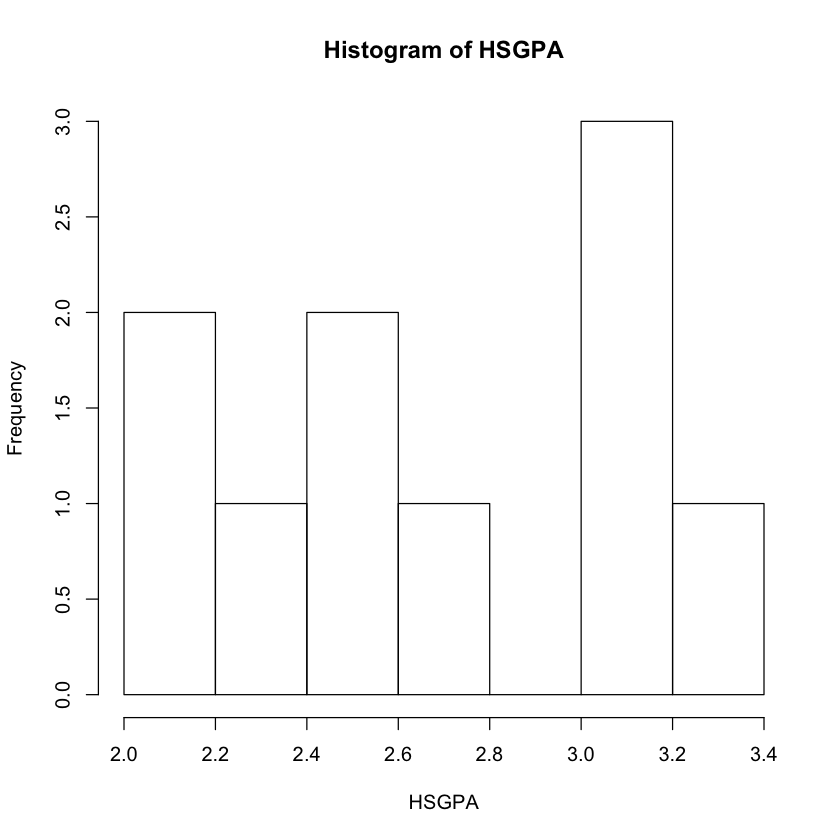

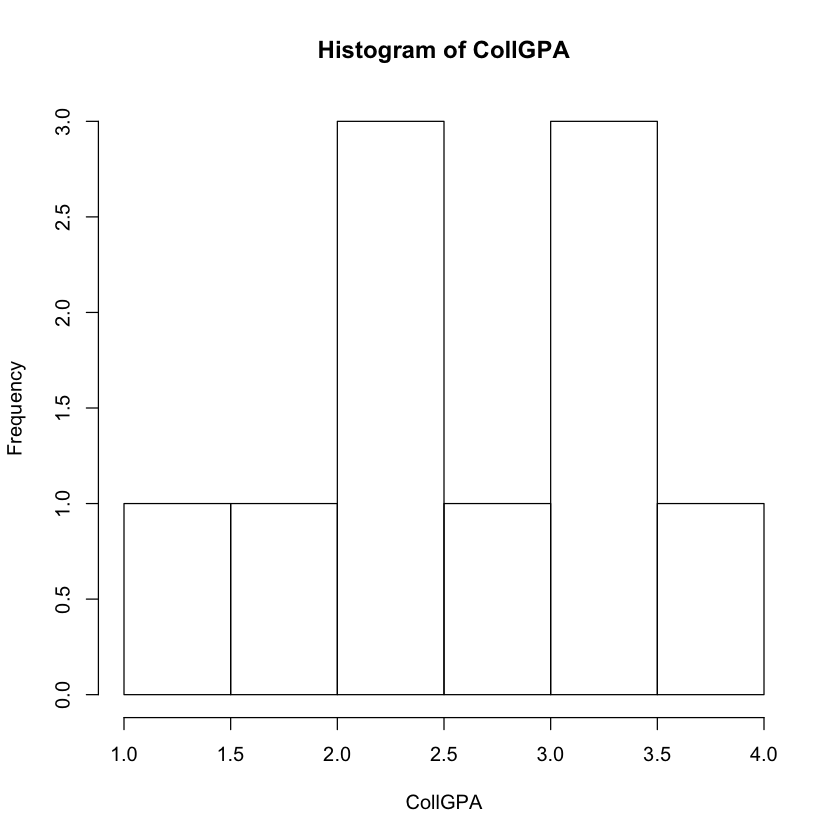

In [2]:
attach(Gpa)
summary(Gpa)
hist(HSGPA) 
hist(CollGPA)
Y <- CollGPA
x <- HSGPA

** 5.2 ** Create a scatterplot of CollGPA versus HSGPA and find the correlation between the two variables. What can we infer from the correlation?

[1] "cor(X,Y) = 0.843923054795065"

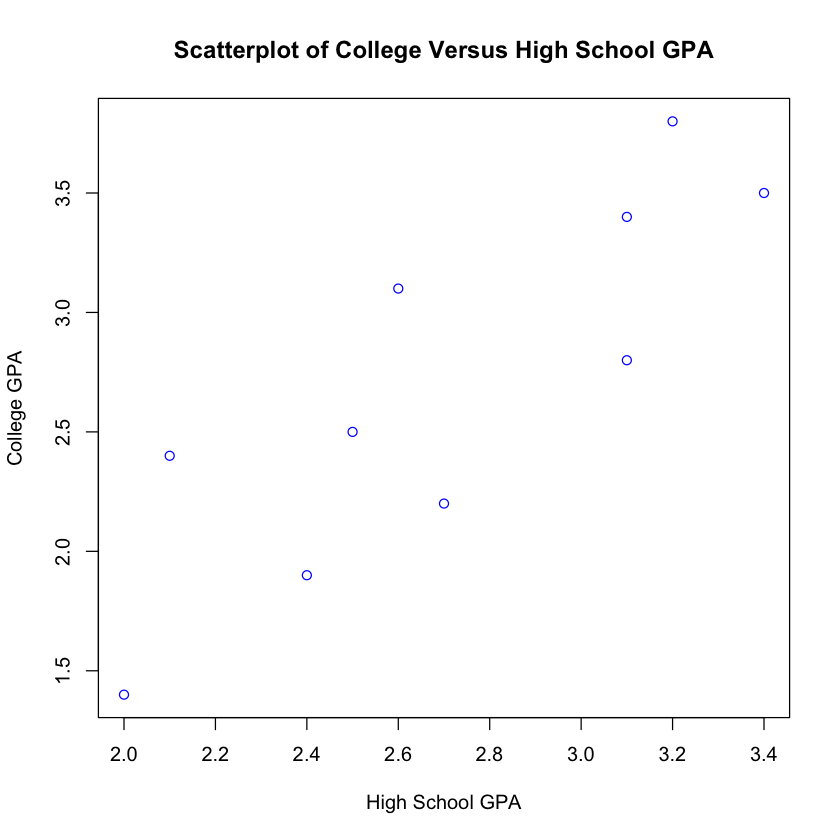

In [3]:
plot(x, Y, col="blue", main="Scatterplot of College Versus High School GPA",
     xlab="High School GPA",ylab="College GPA")
paste('cor(X,Y) =', cor(x,Y))

** 5.3 ** Now that we know a few things about the data, we want to find a line that best represents the relationship between the variables. In other words, we want to draw a slope that comes closest to describing the data.

Characterize the equation mathematically. Find the least squares estimates of $\beta_0$ and $\beta_1$. Corresponding to the model. 
$$ CollGPA = \beta_0 + \beta_1\cdot HSGPA$$


$$\hat{\beta}_0 = \bar{Y}-\hat{\beta}_1\bar{X} \hspace{1cm} \text{ and } \hspace{1cm} 
\hat{\beta}_1 = \frac{\sum_{i=1}^{n}(X_{i}-\bar{X})({Y_{i}-\bar{Y})}}{\sum_{i=1}^{n}(X_{i}-\bar{X})^{2}} $$

In [4]:
b1 <- sum( (x-mean(x))*(Y-mean(Y)) ) / sum( (x-mean(x))^2)
b0 <- mean(Y)-b1*mean(x)
paste('Beta_0: ', b0)
paste('Beta_1: ', b1)

[1] "Beta_0:  -0.950366032210834"

[1] "Beta_1:  1.34699853587116"

** Note: ** To perform the least square regression is R we can use the lm command. If you are interested use the help(lm) command to learn the different options for using this function. To relationship between the variables is defined in the lm command using a tilde ("~") between the vector containing the response variable and the vector containing the explanatory variable: lm(Y ~ x).

If you would like to know what else is stored in the variable you can use the attributes command: attributes(). 

** 5.4 ** Find the least squares estimates of $\beta_0$ and $\beta_1$ using the R
function lm().

In [5]:
model <- lm(Y ~ x)
coef(model)

(Intercept)           x 
  -0.950366    1.346999

** 5.5 ** abline() adds one or more straight lines to the current plot. The arguments to abline() are a=b0 and b=b1. Add the least squares line to the scatterplot created in 1 using the R function abline()

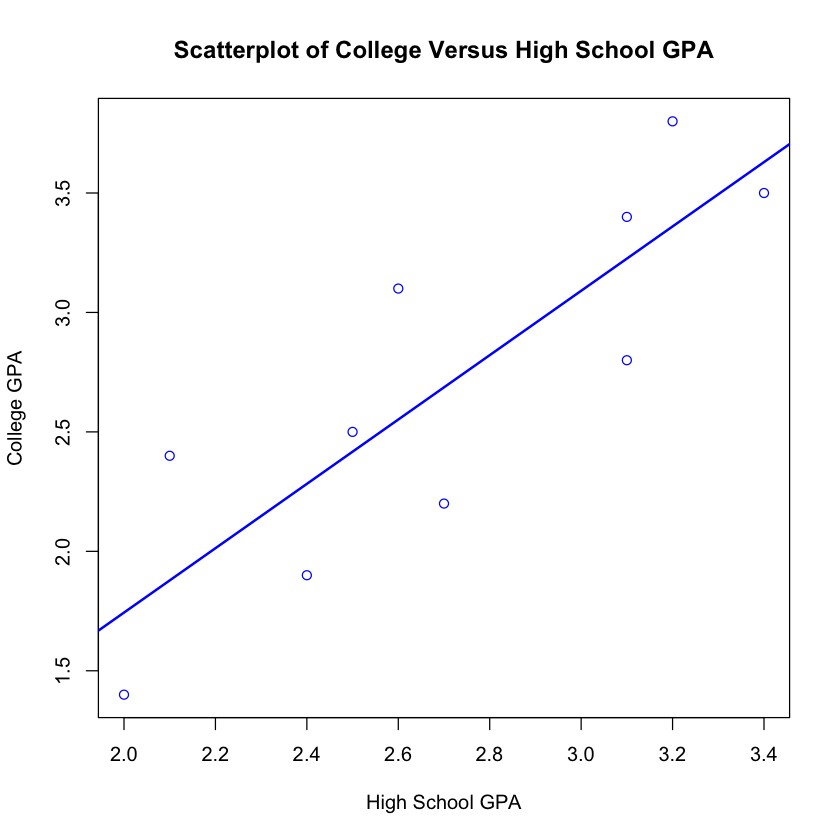

In [6]:
plot(x, Y, col="blue", main="Scatterplot of College Versus High School GPA",
     xlab="High School GPA",ylab="College GPA")
abline(model,col="blue",lwd=2)

** 5.6 ** Compute the sample correlation between $X$ and $\hat{u}_i$

In [7]:
cor(x,model$residuals)

[1] 3.45778e-16

<h3> 6 OLS Goodness of Fit </h3>

When building regression models, "goodness-of-fit" explains how closely our model of the data (i.e. the predictor variables) fits the outcome data. In other words, how much of the variation in an outcome can we explain with a particular model? 

** R-Squared ** is a measure commonly used for assessing model fit.  It can be understood as the proportion of variance in the outcome that can be accounted for by the model.

Looking at our simple bivariate model, we can extract R-squared as a measure of model fit in a number of ways. The easiest is simply to extract it from the lm object using summary(model)\$r.squared.

In [8]:
summary(model)$r.squared

[1] 0.7122061

Warning: We normally discourage students from using the summary command with lm objects.  The reason, as we will see later, is that summary makes a strong assumption called homoskedasticity, which is usually not justified.  However, it is ok to use the command in order to extract R-squared.

But we can also calculate R-squared from our data in a number of ways. Take a couple of minutes to manually calculate R-squared.

**6.1** By squaring the correlation between X and Y.

In [9]:
cor(Y, x)^2 

[1] 0.7122061

**6.2** By taking the ratio of the variance of the fitted values to the variance of Y.

In [10]:
var(model$fitted)/var(Y)

[1] 0.7122061

**6.3** By weighting the slope coefficient: $R^2 = \beta_1^2 \frac{var(X)}{var(Y)}$
 

In [11]:
(coef(model)[2]/sqrt(cov(Y, Y)/cov(x, x)))^2

x 
0.7122061

<h3> 7 Adjusted R Square </h3>

The "Adjusted R-squared" is commonly used in place of the "regular" R-squared, which is sensitive to the number of independent variables in the model. In other words, as we put more variables into the model, R-squared increases even if those variables are unrelated to the outcome. 

Adjusted R-squared attempts to correct for this by deflating R-squared by the expected amount of increase from including irrelevant additional predictors. 

We can see this property of R-squared and Adjusted R-squared by adding a completely random variables unrelated to our other covariates or the outcome into our model and examine the impact on R-squared and Adjusted R-squared.

In [12]:
tmp1 <- rnorm(10, 0, 10)

Add this variable to your simple regression model, creating a new lm object, then observe what happens to R-squared.

In [13]:
model_adj <- lm(Y ~ x + tmp1 )
model_adj$coeff

(Intercept)            x         tmp1 
-0.946598151  1.347216287  0.001613064

Now extract the adjusted R-squared from both models using lm\$adj.r.squared.  It may also go down, but by less than regular r-squared.

In [14]:
summary(model_adj)$r.squared
summary(model_adj)$adj.r.squared

[1] 0.7125727

[1] 0.6304506

<h3> 8 OLS: Issues to be Aware of </h3>

Unfortunately, the pitfalls of applying least squares are not often well understood by many of the people who attempt to apply it. What follows is a list of some of the biggest problems with using least squares regression in practice, along with some brief comments about how these problems may be mitigated or rravoided

** Outliers: **  Least squares regression can perform very badly when some points in the training data have excessively large or small values for the dependent variable compared to the rest of the training data. The reason for this is that since the least squares method is concerned with minimizing the sum of the squared error, any training point that has a dependent value that differs a lot from the rest of the data can have a disproportionately large effect on the resulting constants that are being solved for.

**WARNING: Do not ever remove an observation just because it's an outlier.**

** 8.1 ** Returning to our example, let's add an outlier $(X,Y) = (1.5,3.4)$ redo the scatter plot and compute the correlation.

[1] 0.4986491

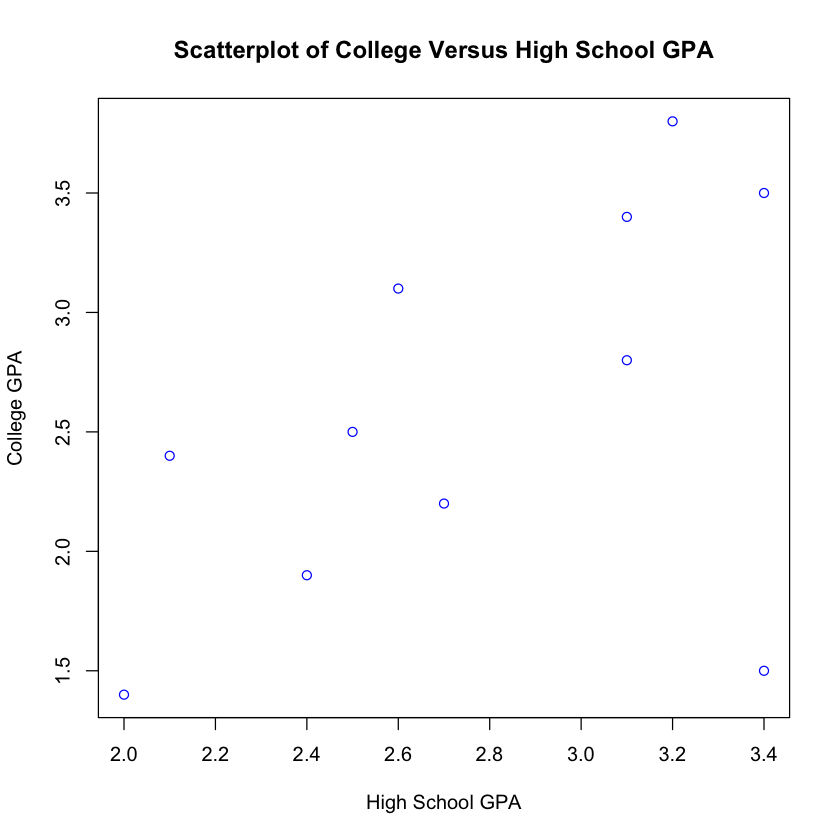

In [15]:
y_out <- c(Gpa$CollGPA,1.5)
x_out <- c(Gpa$HSGPA,3.4)
plot(x_out, y_out, col="blue", main="Scatterplot of College Versus High School GPA",
     xlab="High School GPA",ylab="College GPA")
cor(x_out,y_out)

**8.2** What effect does in inclusion of the scatter plot have on the coefficient $\beta_1$.  Let's see what it does to the linear model.


In [16]:
model_out <- lm(y_out ~ x_out)
model_out$coef

(Intercept)       x_out 
  0.3483516   0.8087912

**8.3** Let's see that scatterplot again with our new regression line.

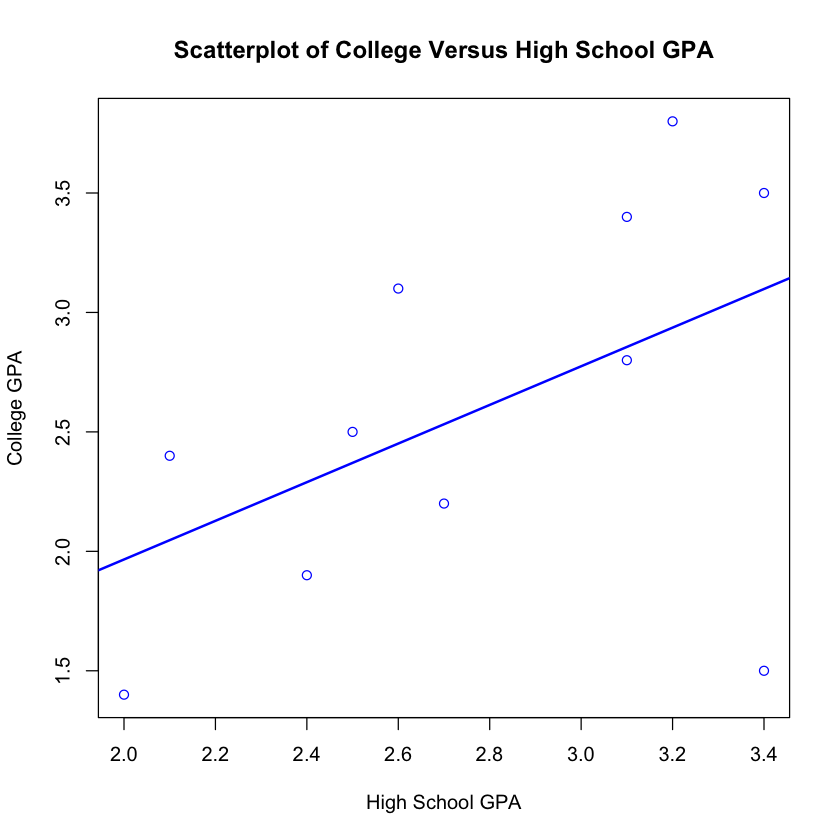

In [17]:
plot(x_out, y_out, col="blue", main="Scatterplot of College Versus High School GPA",
     xlab="High School GPA",ylab="College GPA")
abline(model_out,col="blue",lwd=2)

**WARNING: Do not ever remove an observation just because it's an outlier.**

** Non-Linearities ** All linear regression methods (including, of course, least squares regression), suffer from the major drawback that in reality most systems are not linear.

Let's take another dataset that is clearly non-linear.

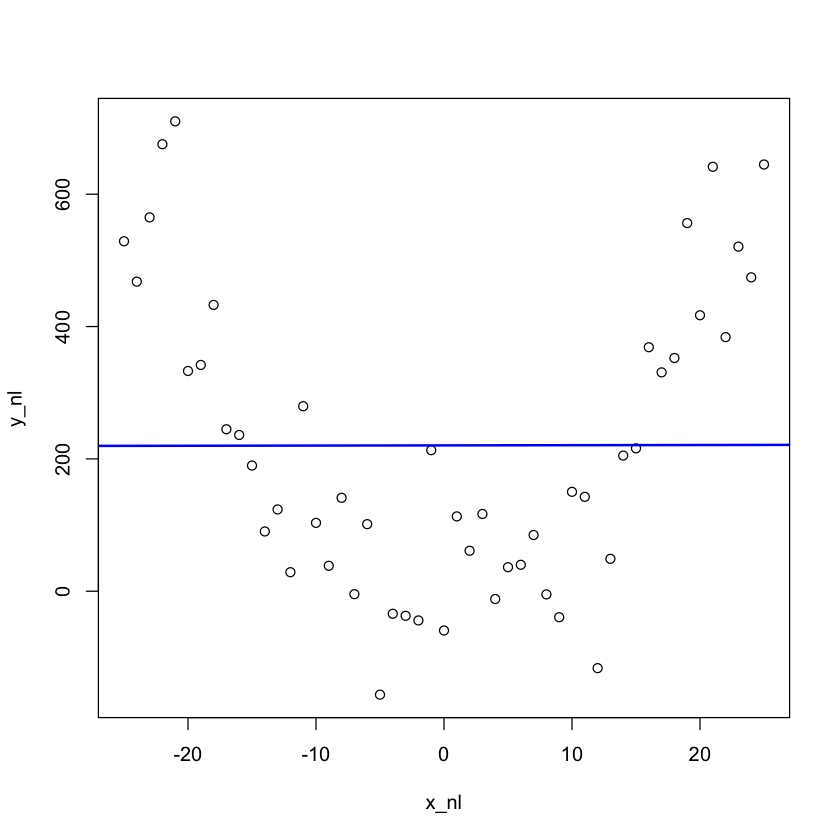

In [18]:
x_nl<-seq(-25,25,1)
y_nl<-x_nl^2+rnorm(51,0,100)
model_nl<-lm(y_nl ~ x_nl)
plot(x_nl,y_nl)
abline(model_nl, col = "blue" , lwd = 2 )

There's definitely a relationship here, but we will need to do a transformation prior to OLS.